In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [199]:
dfm=pd.read_csv('hepatitis.data' )
col=('Class AGE SEX STEROID ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVERBIG LIVERFIRM SPLEEN SPIDERS ASCITES VARICES BILIRUBIN PHOSPHATE SGOT ALBUMIN PROTIME HISTOLOGY').split()
dfm.columns=col

In [200]:
dfm.head(6)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVERBIG,LIVERFIRM,SPLEEN,SPIDERS,ASCITES,VARICES,BILIRUBIN,PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
5,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1


In [201]:
dfm.describe()

,Class,AGE,SEX,ANTIVIRALS,HISTOLOGY
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1.792208,41.272727,1.097403,1.844156,1.454545
std,0.407051,12.574106,0.297473,0.363891,0.499554
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


### Data Cleaning

In [202]:
df=dfm.copy()

In [216]:
dfm=df.copy()
rows=[]
for row in dfm.index:
    # print(row)
    rr=dfm.iloc[row,:].to_string(header=False, index=False).count('?')
    if rr>3:
        rows.append(row)
        print(rr,row)
    
    # print(111111111111111111111111111)
dfm.drop(index=rows,inplace=True)

dfm.info()


5 5
4 6
4 13
5 30
7 40
4 43
14 55
7 71
5 82
4 91
4 98
7 117
4 125
6 146
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 153
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       140 non-null    int64 
 1   AGE         140 non-null    int64 
 2   SEX         140 non-null    int64 
 3   STEROID     140 non-null    object
 4   ANTIVIRALS  140 non-null    int64 
 5   FATIGUE     140 non-null    object
 6   MALAISE     140 non-null    object
 7   ANOREXIA    140 non-null    object
 8   LIVERBIG    140 non-null    object
 9   LIVERFIRM   140 non-null    object
 10  SPLEEN      140 non-null    object
 11  SPIDERS     140 non-null    object
 12  ASCITES     140 non-null    object
 13  VARICES     140 non-null    object
 14  BILIRUBIN   140 non-null    object
 15  PHOSPHATE   140 non-null    object
 16  SGOT        140 non-null    object
 17  ALBUMIN     140 non-null    object
 18  PROTIME     140 no

In [217]:
# col=('Class AGE SEX STEROID ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVERBIG LIVERFIRM SPLEEN SPIDERS ASCITES VARICES BILIRUBIN PHOSPHATE SGOT ALBUMIN PROTIME').split()
for col in dfm.columns:
    d=dfm[dfm[col]=='?'][col].size
    print(col,d)

    if (dfm[col].dtype=='object'):
        if d<9:
            dfm[col].replace('?', dfm[col].mode()[0], inplace=True)
            # dfm.drop(dfm[dfm[col]=='?'].index,inplace=True)
            # print(dfm[col].value_counts())
            dfm[col]=pd.to_numeric(dfm[col])
        elif d>8:
            dfm.drop(columns=col,inplace=True)
            # print(dfm[dfm[col]=='?'])
     
    else:
        # print(col)
        pass
        
dfm.info()

Class 0
AGE 0
SEX 0
STEROID 1
ANTIVIRALS 0
FATIGUE 0
MALAISE 0
ANOREXIA 0
LIVERBIG 2
LIVERFIRM 3
SPLEEN 0
SPIDERS 0
ASCITES 0
VARICES 0
BILIRUBIN 0
PHOSPHATE 19
SGOT 0
ALBUMIN 8
PROTIME 53
HISTOLOGY 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 153
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Class       140 non-null    int64  
 1   AGE         140 non-null    int64  
 2   SEX         140 non-null    int64  
 3   STEROID     140 non-null    int64  
 4   ANTIVIRALS  140 non-null    int64  
 5   FATIGUE     140 non-null    int64  
 6   MALAISE     140 non-null    int64  
 7   ANOREXIA    140 non-null    int64  
 8   LIVERBIG    140 non-null    int64  
 9   LIVERFIRM   140 non-null    int64  
 10  SPLEEN      140 non-null    int64  
 11  SPIDERS     140 non-null    int64  
 12  ASCITES     140 non-null    int64  
 13  VARICES     140 non-null    int64  
 14  BILIRUBIN   140 non-null    float

In [192]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 153
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Class       140 non-null    int64  
 1   AGE         140 non-null    int64  
 2   SEX         140 non-null    int64  
 3   STEROID     140 non-null    int64  
 4   ANTIVIRALS  140 non-null    int64  
 5   FATIGUE     140 non-null    int64  
 6   MALAISE     140 non-null    int64  
 7   ANOREXIA    140 non-null    int64  
 8   LIVERBIG    140 non-null    int64  
 9   LIVERFIRM   140 non-null    int64  
 10  SPLEEN      140 non-null    int64  
 11  SPIDERS     140 non-null    int64  
 12  ASCITES     140 non-null    int64  
 13  VARICES     140 non-null    int64  
 14  BILIRUBIN   140 non-null    float64
 15  SGOT        140 non-null    int64  
 16  HISTOLOGY   140 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 19.7 KB


In [205]:
dfm.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVERBIG,LIVERFIRM,SPLEEN,SPIDERS,ASCITES,VARICES,BILIRUBIN,SGOT,HISTOLOGY
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,1.800000,40.800000,1.100000,1.521429,1.835714,1.342857,1.607143,1.800000,1.835714,1.578571,1.800000,1.664286,1.864286,1.871429,1.421429,83.871429,1.464286
std,0.401436,12.073635,0.301077,0.501334,0.371865,0.476369,0.490139,0.401436,0.371865,0.495561,0.401436,0.473935,0.343715,0.335927,1.217722,82.977751,0.500514
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,14.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,31.750000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,56.500000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,103.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,648.000000,2.000000


In [218]:
dfm.shape

(140, 18)

### Visualization


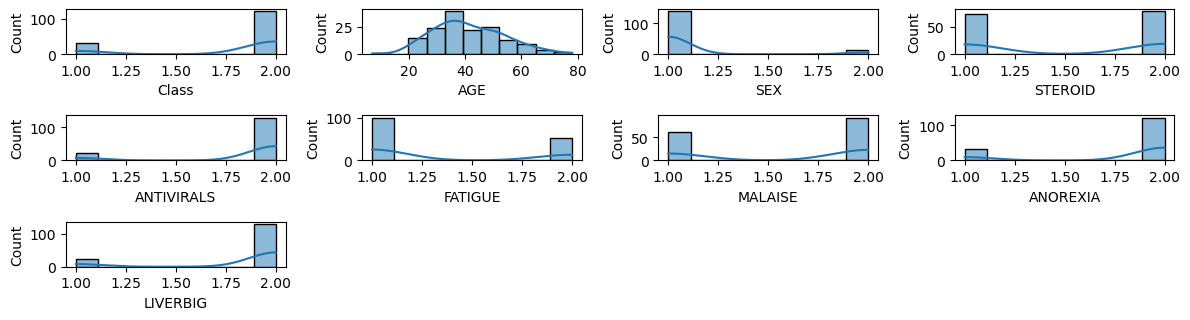

In [38]:
plt.figure(figsize=(12, 5))
no=0
for col in df.columns:
    no+=1
    st='54'+str(no)
    fig=plt.subplot(int(st))
    sns.histplot(df[col] , kde=True) 
    plt.tight_layout() 
    if int(st) == 549:
        break

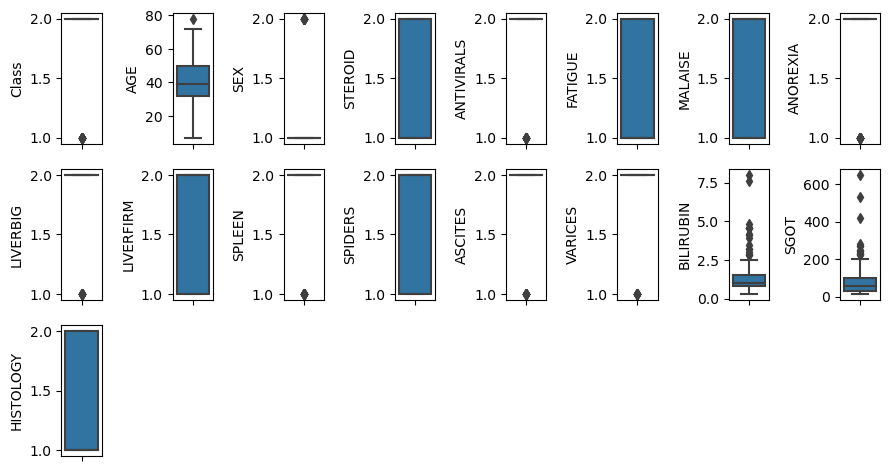

In [40]:
plt.figure(figsize=(9,5 ))
no=0
for col in df.columns:
    no+=1
    plt.subplot(3,8,no)
    plt.tight_layout()
    sns.boxplot(y=df[col])  

In [ ]:
# plt.figure(figsize=(6,6))
# sns.pairplot(df )

### Modelling

In [24]:
# for col in df.columns:
#     IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
#     q_low = df[col].quantile(0.25) - 1.5 * IQR
#     q_hi  = df[col].quantile(0.75) + 1.5 * IQR
#     df = df[(df[col] < q_hi) & (df[col] > q_low)]

In [48]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix ,classification_report , accuracy_score ,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier,Perceptron,LinearRegression, Ridge, SGDRegressor,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn import metrics
import math

In [277]:
X = dfm.iloc[:, 1:].values
y = dfm.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=85 )
y_test=y_test-1
y_train=y_train-1

In [276]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [278]:

sgr_model = make_pipeline(StandardScaler(),SGDClassifier(loss="log", penalty="l2", max_iter=1000))

sgr_model.fit(X_train, y_train)
y_predict = sgr_model.predict(X_test)
print('-----------   SGD  ---------')
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))


-----------   SGD  ---------
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.87      1.00      0.93        33

    accuracy                           0.88        42
   macro avg       0.93      0.72      0.77        42
weighted avg       0.90      0.88      0.86        42

[[ 4  5]
 [ 0 33]]


In [279]:
clf = make_pipeline(StandardScaler(),Perceptron(penalty='l1'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('-----------   Perceptron  ---------')

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

-----------   Perceptron  ---------
              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.89      0.94      0.91        33

    accuracy                           0.86        42
   macro avg       0.80      0.75      0.77        42
weighted avg       0.85      0.86      0.85        42

[[ 5  4]
 [ 2 31]]


In [226]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
print('------ LogisticRegression --------------')
best=0


grid = ParameterGrid({"max_samples": [20],
                          "max_features": [ 10,15],
                          "bootstrap": [True, False],
                          "n_estimators":[20,80],
                          "bootstrap_features": [True, False]})


paramsg={'logistic__penalty': ['l2'],'logistic__C': [1,5,10],'logistic__max_iter': [10,500]}
scaler=StandardScaler()
logistic=LogisticRegression()
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])

modelLogisticRegression = GridSearchCV(pipe, param_grid=paramsg)

# pipelog = Pipeline([('scaler', StandardScaler()), ('LR_model', LogisticRegression())])

# modelLogisticRegression = GridSearchCV(pipelog, param_grid={'logisticregression__penalty': ['l1','l2' , 'elasticnet'],'logisticregression__C': [1,5,10],'logisticregression__max_iter': [10,1000]}, cv=3)
for params in grid:
    model=BaggingClassifier(base_estimator=modelLogisticRegression, random_state=5,**params)
    # print(model,111)
    # print(modelLogisticRegression)
    try:
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        acc=accuracy_score(y_test, y_predict)
        print(333333333333,acc)
        try:            
                    print(classification_report(y_test, y_predict))
                    print(confusion_matrix(y_test, y_predict))
                    if  acc > best:
                                   best=acc
                                   # bestr2=metrics.r2_score(y_test, y_predict) 
                                   matrisresult=[base_estimator , params , best ]
        except:
                    print(222222222222)
    except:
        print(33)

# print(classification_report(y_test, y_predict))
# print(confusion_matrix(y_test, y_predict))
print(best, matrisresult)

------ LogisticRegression --------------
333333333333 0.8333333333333334
              precision    recall  f1-score   support

           1       1.00      0.22      0.36         9
           2       0.82      1.00      0.90        33

    accuracy                           0.83        42
   macro avg       0.91      0.61      0.63        42
weighted avg       0.86      0.83      0.79        42

[[ 2  7]
 [ 0 33]]
33
333333333333 0.7857142857142857
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.79      1.00      0.88        33

    accuracy                           0.79        42
   macro avg       0.39      0.50      0.44        42
weighted avg       0.62      0.79      0.69        42

[[ 0  9]
 [ 0 33]]
33
333333333333 0.8809523809523809
              precision    recall  f1-score   support

           1       1.00      0.44      0.62         9
           2       0.87      1.00      0.93        33

 

In [ ]:
accuracy=0.9047619047619048
[GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('LR_model', LogisticRegression())]),
             param_grid={'logisticregression__C': [1, 5, 10],
                         'logisticregression__max_iter': [10, 1000]}), {'bootstrap': True, 'bootstrap_features': False, 'max_features': 15, 'max_samples': 20, 'n_estimators': 20}, 0.9047619047619048]


   precision    recall  f1-score   support

           1       1.00      0.56      0.71         9
           2       0.89      1.00      0.94        33

    accuracy                           0.90        42
   macro avg       0.95      0.78      0.83        42
weighted avg       0.92      0.90      0.89        42

[[ 5  4]
 [ 0 33]]

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5 color=yellow>
        <div  align=center>
            بهترین نتیجه: 
        </div>
        <br/>
    </font>
</div>

In [281]:

paramsg={'logistic__penalty': ['l2' ,'l1'],'logistic__C': [0.5,1,5,10],'logistic__max_iter': [500,100]}
scaler=StandardScaler()
logistic=LogisticRegression()
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])

modelLogisticRegression = GridSearchCV(pipe, param_grid=paramsg)

modelLogisticRegression.fit(X_train, y_train)
y_predict = modelLogisticRegression.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
modelLogisticRegression.best_params_


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.92      1.00      0.96        33

    accuracy                           0.93        42
   macro avg       0.96      0.83      0.88        42
weighted avg       0.93      0.93      0.92        42

[[ 6  3]
 [ 0 33]]


{'logistic__C': 0.5, 'logistic__max_iter': 500, 'logistic__penalty': 'l2'}

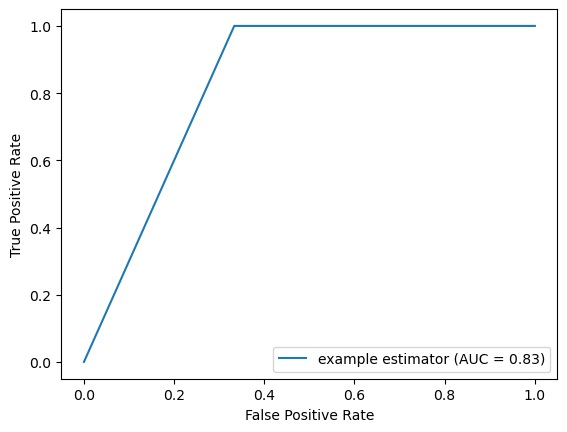

In [282]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()


In [283]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
print('------ LogisticRegression --------------')

pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('LR_model', LogisticRegression(C=1, penalty='l2', multi_class='auto',max_iter=1000))])

pipe.fit(X_train, y_train)
y_predict = pipe.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

------ LogisticRegression --------------
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.92      1.00      0.96        33

    accuracy                           0.93        42
   macro avg       0.96      0.83      0.88        42
weighted avg       0.93      0.93      0.92        42

[[ 6  3]
 [ 0 33]]


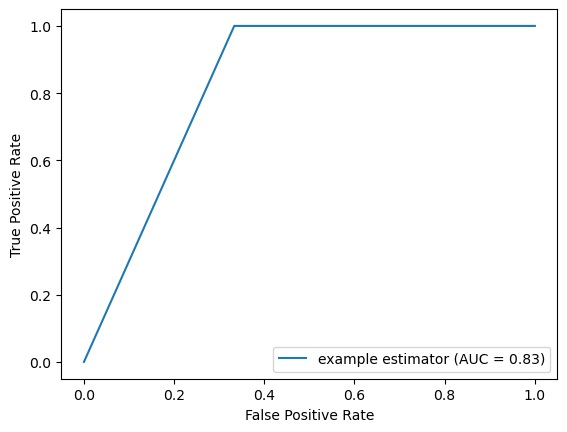

In [284]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

In [285]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print('------ KNeighborsClassifier --------------')

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))



------ KNeighborsClassifier --------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.77      0.91      0.83        33

    accuracy                           0.71        42
   macro avg       0.38      0.45      0.42        42
weighted avg       0.60      0.71      0.65        42

[[ 0  9]
 [ 3 30]]


In [ ]:
from sklearn import utils
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

best=0
grid = ParameterGrid({"max_samples": [ 5],
                          "max_features": [1, 10,15],
                          "bootstrap": [True, False],
                          "n_estimators":[10,100],
                          "bootstrap_features": [True, False]})

pipeknn = make_pipeline( KNeighborsClassifier())
modelknn = GridSearchCV(pipeknn, param_grid={'kneighborsclassifier__n_neighbors': [1, 3]} , cv=2)                                     

pipelog = Pipeline([('scaler', StandardScaler()), ('LR_model', LogisticRegression())])
modelLogisticRegression = GridSearchCV(pipelog, param_grid={'logisticregression__C': [1,5,10],'logisticregression__max_iter': [10,1000]}, cv=2)

pipesgd = make_pipeline(StandardScaler(),SGDClassifier())
modelsgd = GridSearchCV(pipesgd, param_grid={'sgdclassifier__loss': ['log','hinge', 'log_loss'], 'sgdclassifier__penalty': ['l1','l2','elasticnet']}, cv=2)

pipeRandomForestClassifier = make_pipeline(RandomForestClassifier())
modelRandomForest = GridSearchCV(pipeRandomForestClassifier, param_grid= {"randomforestclassifier__n_estimators": [10, 20], "randomforestclassifier__max_leaf_nodes": [4, 6]}, cv=2)

for base_estimator in [
                           None,
                           modelknn,
                           modelRandomForest,
                           modelLogisticRegression,
                           modelsgd
]:
        for params in grid:
            print(1111111111111111111,params)
            print(22222222222222222222222,base_estimator)
            model=BaggingClassifier(base_estimator=base_estimator, random_state=utils.check_random_state(0),**params)
            model.fit(X_train, y_train)
            y_predict= model.predict(X_test)
            acc=accuracy_score(y_test, y_predict)
            print(333333333333,acc)

            try:
            
                # print(classification_report(y_test, y_predict))
                # print(confusion_matrix(y_test, y_predict))
                if  acc > best:
                               best=acc
                               # bestr2=metrics.r2_score(y_test, y_predict) 
                               matrisresult=[base_estimator , params , best ]
            except:
                pass
          
        try:
            print('estimator:',base_estimator, 'Parameters:', params, 'accuracy_score:' , acc)
            print('--------------------------------------------------------------------')

        except:
            print('--------------------------------------------------------------------')
        
print('result:',matrisresult)
print("accuracy_score%: ", 100*round(best) )
                # print("R2_SCORE: ", metrics.r2_score(y_test, y_predict))
                # print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
                # print(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean())

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC,SVR



In [78]:
X = dfm.iloc[:, 2:13].values
y = dfm.loc[:,'cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85 )

In [81]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
y_predict_lr= model.predict(X_test)
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_lr))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_lr))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_lr))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_lr))
print("RMSE%: ", 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / dfm["cnt"].mean(),2))

R2_SCORE:  0.775014899368656
MSE :  838560.1275646058
RMSE:  915.7292872703187
Mean Absolute Error (MAE):  667.9263182248882
MAPE:  0.19309379941033625
RMSE%:  20.0


In [82]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              PolynomialFeatures(degree=3), 
              Ridge(alpha=1))
ridge_poly_model.fit(X_train, y_train)
y_predict_lr = ridge_poly_model.predict(X_test)

print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_lr))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_lr))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_lr))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_lr))
print("RMSE%: ", 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / dfm["cnt"].mean(),2))

R2_SCORE:  0.8292606268992271
MSE :  636376.4982032698
RMSE:  797.7320967613562
Mean Absolute Error (MAE):  514.1337067948022
MAPE:  0.238464741055681
RMSE%:  18.0


In [83]:
pipe = make_pipeline(preprocessing.StandardScaler(), PolynomialFeatures(),Ridge())

model = GridSearchCV(pipe, param_grid={'polynomialfeatures__degree': [1, 2,3], 'polynomialfeatures__include_bias' :[True , False] , 'ridge__alpha': [0.5, 1,5, 10, 20,50]})
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print("R2_SCORE: ", metrics.r2_score(y_test, y_predict))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
print("RMSE%: ", 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean(),2))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict)))

print(model.best_score_ , model.best_params_)

R2_SCORE:  0.8552635768980166
MAPE:  0.19952278516717475
RMSE%:  16.0
RMSE:  734.4785936378335
0.8482045045839204 {'polynomialfeatures__degree': 2, 'polynomialfeatures__include_bias': False, 'ridge__alpha': 50}


In [69]:

reg_bagging = BaggingRegressor(DecisionTreeRegressor(min_samples_leaf=5), n_estimators=100, bootstrap=False, n_jobs=-1, max_samples=50)

reg_bagging.fit(X_train, y_train)
y_predict = reg_bagging.predict(X_test)


In [ ]:
pipe = make_pipeline(StandardScaler(), SVR())
clf_gridSearch = GridSearchCV(pipe, param_grid={'svr__epsilon': [0.001, 0.01, 0.1, 1, 10], 'svr__C': [0.1, 1, 10, 100]})
clf_gridSearch.fit(X_train, y_train)
y_predict = clf_gridSearch.predict(X_test)

In [75]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict)))

print("RMSE%: ", 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean(),2))
print(clf_gridSearch.best_score_ , clf_gridSearch.best_params_)

R2_SCORE:  0.7983579803247292
MAPE:  0.2754848673291777
RMSE:  866.923437488024
RMSE%:  19.0
0.7735109734592813 {'svr__C': 100, 'svr__epsilon': 10}


In [9]:
from sklearn.ensemble import BaggingRegressor

reg_bagging = BaggingRegressor(DecisionTreeRegressor(min_samples_leaf=5), n_estimators=100, bootstrap=False, n_jobs=-1, max_samples=50)

reg_bagging.fit(X_train, y_train)
y_predict = reg_bagging.predict(X_test)


In [74]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict)))

print("RMSE%: ", 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean(),2))

R2_SCORE:  0.7983579803247292
MAPE:  0.2754848673291777
RMSE:  866.923437488024
RMSE%:  19.0


In [91]:
from sklearn import utils
from sklearn.model_selection import ParameterGrid
from sklearn.dummy import DummyRegressor
best=10000000
grid = ParameterGrid({"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "n_estimators":[1,100],
                          "bootstrap_features": [True, False]})

if 2<1:
      # grid = ParameterGrid({"max_samples": [ 1.0],
    #                           "max_features": [ 1.0],
    #                           "bootstrap": [True],
    #                           "n_estimators":[1],
    #                           "bootstrap_features": [True]})

    # modelpoly = GridSearchCV(pipepoly, param_grid={'polynomialfeatures__degree': [1], 'polynomialfeatures__include_bias' :[True] , 'ridge__alpha': [1]})                                       
    # modelkneighbors = GridSearchCV(pipek, param_grid={'kneighborsregressor__n_neighbors': [1 ]})
    # modelsvr = GridSearchCV(pipesvr, param_grid={'svr__epsilon': [1], 'svr__C': [0.1]})
    pass
  

pipepoly = make_pipeline(preprocessing.StandardScaler(), PolynomialFeatures(),Ridge())
modelpoly = GridSearchCV(pipepoly, param_grid={'polynomialfeatures__degree': [1, 2], 'polynomialfeatures__include_bias' :[True , False] , 'ridge__alpha': [0.5, 1,5, 10, 20,50]})                                       

pipek = make_pipeline(preprocessing.StandardScaler(), KNeighborsRegressor())
modelkneighbors = GridSearchCV(pipek, param_grid={'kneighborsregressor__n_neighbors': [1,5 ]})

pipesvr = make_pipeline(preprocessing.StandardScaler(), SVR())
modelsvr = GridSearchCV(pipesvr, param_grid={'svr__epsilon': [0.001,  1, 10], 'svr__C': [0.1, 10, 100]})

for base_estimator in [
                           None,
                           modelpoly,
                           DecisionTreeRegressor(),
                           modelkneighbors,
                           modelsvr
]:
        for params in grid:
            # print(**params)
            model=BaggingRegressor(base_estimator=base_estimator, random_state=utils.check_random_state(0),**params)
            model.fit(X_train, y_train)
            y_predict= model.predict(X_test)
            
            # print(base_estimator, "R2_SCORE: ", metrics.r2_score(y_test, y_predict))
            # print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
            # print(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean())
            rmse=math.sqrt(metrics.mean_squared_error(y_test, y_predict))
            
            if  rmse < best:
                           best=rmse
                           bestr2=metrics.r2_score(y_test, y_predict) 
                           matrisresult=[base_estimator , params , bestr2,best ]
          
        try:
            print('estimator:',base_estimator, 'Parameters:', params, 'RMSE:' , rmse)   
        except:
            print('--------------------------------------------------------------------')
        
print('result:',matrisresult)
print("RMSE%: ", 100*round(best) / dfm["cnt"].mean(),2)
                # print("R2_SCORE: ", metrics.r2_score(y_test, y_predict))
                # print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
                # print(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean())

estimator: None Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10} RMSE: 870.8113611263157
estimator: GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2],
                         'polynomialfeatures__include_bias': [True, False],
                         'ridge__alpha': [0.5, 1, 5, 10, 20, 50]}) Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10} RMSE: 734.4785936378337
estimator: DecisionTreeRegressor() Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10} RMSE: 870.8113611263157
estimator: GridSearchCV(esti

In [ ]:
best result:
    
    
estimator: DecisionTreeRegressor. Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100} RMSE: 863.1040996543442
result: [None, {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}, 
r2: 0.888974336782214, 643.282760910281]
RMSE%:  14.275093320666848 2

In [4]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.arima import AutoARIMA


In [77]:
y=dft.cnt
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon(
    pd.period_range("2012-12-27", periods=5, freq="D"), is_relative=False
)
cutoff = pd.Period("2012-12-26", freq="D")
fh.to_relative(cutoff)

ForecastingHorizon([1, 2, 3, 4, 5], dtype='int64', is_relative=True)

In [ ]:
y_train=dft.iloc[0:-6,-1]
y_test=dft.iloc[-5:-1,-1]

# y_train, y_test = temporal_train_test_split(y, fh=fh)
forecaster = AutoARIMA(sp=7, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])